In [146]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize

In [175]:
can = pd.read_csv("cannabis_full.csv")
can = can.dropna()

In [115]:
can.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
can = can.drop(['Flavor', 'Effects', 'Strain'], axis=1)

## Part One: Binary Classification


In [117]:
can.head()

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,hybrid,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hybrid,4.7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hybrid,4.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hybrid,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

In [118]:
typed = can[(can['Type'] == 'sativa') | (can['Type'] == 'indica')]
X = typed.drop(['Type'], axis = 1)
y = typed['Type']

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

Report the (cross-validated!) metric.

Fit the final model.

Output a confusion matrix.

## Q1: LDA

In [119]:

LDA = Pipeline(
  [
  ("LDA", LinearDiscriminantAnalysis())]
)

cross_val_score(LDA, X, y, cv=5, scoring='roc_auc').mean()

0.9260402178812139

I chose ROC_AUC as the metric because our predictions are binary and we are not favoring a target variable.

In [120]:
LDAfit = LDA.fit(X,y)
y_preds = LDAfit.predict(X)
confusion_matrix(y, y_preds)

array([[627,  60],
       [ 86, 345]], dtype=int64)

## Q2: QDA

In [121]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = Pipeline(
  [
  ("QDA", QuadraticDiscriminantAnalysis())]
)

cross_val_score(QDA, X, y, cv=5, scoring='roc_auc').mean()

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.767575503964195

I chose ROC_AUC as the metric because our predictions are binary and we are not favoring a target variable.

In [122]:
QDAfit = QDA.fit(X,y)
y_preds_qda = QDAfit.predict(X)
confusion_matrix(y, y_preds_qda)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([[ 24, 663],
       [  0, 431]], dtype=int64)

## Q3: SVC

In [123]:
svc = Pipeline([("svc", SVC())])
tune = {'svc__C': [.12,.1,.001,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv1 = GridSearchCV(svc, tune, cv = 5, scoring='roc_auc')
gscv1fit = gscv1.fit(X,y)


I chose ROC_AUC as the metric because our predictions are binary and we are not favoring a target variable.

In [124]:
gscv1.best_params_

{'svc__C': 0.1}

In [125]:
svc = Pipeline([("svc", SVC(C=.1))])
cross_val_score(svc, X, y, cv=5, scoring='roc_auc').mean()

0.9336773813059519

In [126]:
svcfit = svc.fit(X,y)
y_preds_svc = svcfit.predict(X)
confusion_matrix(y, y_preds_svc)

array([[651,  36],
       [135, 296]], dtype=int64)

## Q4: SVM

In [127]:
svm = Pipeline([("svm", SVC(kernel = 'poly'))])
tune = {'svm__C': [.12,.1,.001,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv2 = GridSearchCV(svm, tune, cv = 5, scoring='roc_auc')
gscv2fit = gscv2.fit(X,y)


In [128]:
gscv2.best_params_

{'svm__C': 0.4}

I chose ROC_AUC as the metric because our predictions are binary and we are not favoring a target variable.

In [129]:
svm = Pipeline([("svm", SVC(C=.4, kernel = 'poly'))])
cross_val_score(svm, X, y, cv=5, scoring='roc_auc').mean()

0.9358319864002814

In [130]:
svmfit = svm.fit(X,y)
y_preds_svm = svmfit.predict(X)
confusion_matrix(y, y_preds_svm)

array([[646,  41],
       [101, 330]], dtype=int64)

## Part Two: Natural Multiclass

In [143]:
can = can.dropna()
X = can.drop(['Type'],axis=1)
y = can['Type']

Q1
Fit a decision tree, plot the final fit, and interpret the results.


In [132]:
DT1 = Pipeline(
    [('DT1', DecisionTreeClassifier())]
)
neigh = {'DT1__max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'DT1__min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

gscv = GridSearchCV(DT1, neigh, cv = 5, scoring='accuracy')
gscvfit = gscv.fit(X,y)

In [133]:
gscvfit.best_params_

{'DT1__max_depth': 3, 'DT1__min_samples_split': 2}

In [134]:
DT1 = Pipeline(
    [('DT1', DecisionTreeClassifier(max_depth= 3, min_samples_split= 2))]
)
cv2 = cross_val_score(DT1, X,y, cv=5, scoring = "accuracy")
cv2.mean()

0.6216919739696312

In [135]:
DT1fit = DT1.fit(X,y)

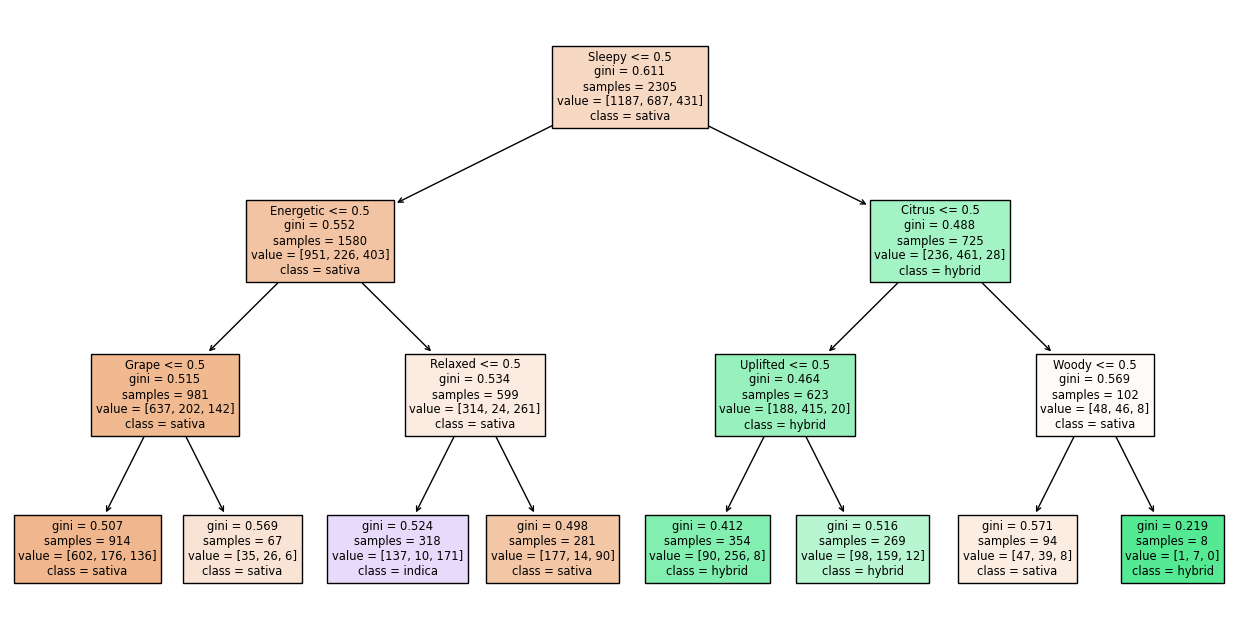

In [136]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(DT1fit.named_steps['DT1'], feature_names=X.columns.tolist(), class_names=['sativa','hybrid', 'indica'], filled=True)
plt.show()

This tree shows us that the most important factor in determining the cannabis type is whether or not the strain makes you sleepy because it is the highest on the decision tree. Whether or not the strain makes you energetic or tastes like citrus are the next best predictors because they are in the second row of the decision tree.

Q2
Repeat the analyses from Part One for LDA, QDA, and KNN.


In [137]:

LDA1 = Pipeline(
  [
  ("LDA1", LinearDiscriminantAnalysis())]
)

cross_val_score(LDA1, X, y, cv=5, scoring='accuracy').mean()

0.6290672451193059

In [138]:
LDA1fit = LDA1.fit(X,y)
y_preds1 = LDA1fit.predict(X)
confusion_matrix(y, y_preds1)

array([[829, 211, 147],
       [211, 467,   9],
       [224,  21, 186]], dtype=int64)

In [139]:
QDA1 = Pipeline(
  [
  ("QDA1", QuadraticDiscriminantAnalysis())]
)

cross_val_score(QDA1, X, y, cv=5, scoring='accuracy').mean()

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.20433839479392626

In [140]:
QDA1fit = QDA1.fit(X,y)
y_preds_qda1 = QDA1fit.predict(X)
confusion_matrix(y, y_preds_qda1)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([[  27,   10, 1150],
       [   8,   22,  657],
       [   1,    0,  430]], dtype=int64)

In [149]:
from sklearn.neighbors import KNeighborsClassifier
X = np.ascontiguousarray(X)
Knn1 = Pipeline(
    [('KNN', KNeighborsClassifier())]
)
neigh = {'KNN__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

gscv3 = GridSearchCV(Knn1, neigh, cv = 5, scoring= 'accuracy')


In [151]:
gscv3.fit(X,y)
gscv3.best_params_

{'KNN__n_neighbors': 19}

In [152]:
Knn1 = Pipeline(
    [('KNN', KNeighborsClassifier(n_neighbors=19))]
)

In [154]:
cross_val_score(Knn1,X,y,cv=5, scoring='accuracy').mean()

0.6043383947939263

In [155]:
Knnfit = Knn1.fit(X,y)
y_predsKN = Knnfit.predict(X)
confusion_matrix(y, y_predsKN)

array([[944, 185,  58],
       [274, 410,   3],
       [299,  22, 110]], dtype=int64)

Q3
Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

The metrics were worse than in part one. This makes sense because it went from 2 possibilities, to 3 possibilities. 50 percent is the baseline in binary models but with 3 classes, the baseline is .33. Indica and sativa were most likely to get mixed up according to the matrices because across all three confusion matrices, there were high numbers of predicted indica when it was actually sativa and vice versa.

## Part Three: Multiclass from Binary

Consider two models designed for binary classification: SVC and Logistic Regression.

## Q1
Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

In [177]:
dummies = pd.get_dummies(can['Type'], prefix = "Type_is")
can = can.join(dummies)
can.head()

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,Type_is_hybrid,Type_is_indica,Type_is_sativa
0,hybrid,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,hybrid,4.7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,hybrid,4.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,hybrid,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0



## Indica vs. Not Indica

In [178]:
X = can.drop(['Type', 'Type_is_hybrid', 'Type_is_indica', 'Type_is_sativa'], axis=1)
y = can['Type_is_indica']

Log0 = Pipeline(
    [('Log0', LogisticRegression())]
)

cross_val_score(Log0, X,y, cv=5, scoring = "f1").mean()

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.6369393276729307

In [179]:
svc = Pipeline([("svc", SVC())])
tune = {'svc__C': [.12,.1,.001,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv1 = GridSearchCV(svc, tune, cv = 5, scoring='f1')
gscv1fit = gscv1.fit(X,y)
svc = Pipeline([("svc", SVC(C=gscv1fit.best_params_.get('svc__C')))])
cross_val_score(svc, X, y, cv=5, scoring='f1').mean()

0.6520061298622245

## Sativa vs. Not Sativa

In [180]:
X = can.drop(['Type', 'Type_is_hybrid', 'Type_is_indica', 'Type_is_sativa'], axis=1)
y = can['Type_is_sativa']

Log0 = Pipeline(
    [('Log0', LogisticRegression())]
)

cross_val_score(Log0, X,y, cv=5, scoring = "f1").mean()

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3921532019192431

In [181]:
svc = Pipeline([("svc", SVC())])
tune = {'svc__C': [.12,.1,.001,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv1 = GridSearchCV(svc, tune, cv = 5, scoring='f1')
gscv1fit = gscv1.fit(X,y)
svc = Pipeline([("svc", SVC(C=gscv1fit.best_params_.get('svc__C')))])
cross_val_score(svc, X, y, cv=5, scoring='f1').mean()

0.3964838735023628

## Hybrid vs. Not Hybrid

In [182]:
X = can.drop(['Type', 'Type_is_hybrid', 'Type_is_indica', 'Type_is_sativa'], axis=1)
y = can['Type_is_hybrid']

Log0 = Pipeline(
    [('Log0', LogisticRegression())]
)

cross_val_score(Log0, X,y, cv=5, scoring = "f1").mean()

0.645267205320214

In [183]:
svc = Pipeline([("svc", SVC())])
tune = {'svc__C': [.12,.1,.001,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv1 = GridSearchCV(svc, tune, cv = 5, scoring='f1')
gscv1fit = gscv1.fit(X,y)
svc = Pipeline([("svc", SVC(C=gscv1fit.best_params_.get('svc__C')))])
cross_val_score(svc, X, y, cv=5, scoring='f1').mean()

0.6874795336787267

## Q2
Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

The model that performed the best at distinguishing the target category from the rest was the SVC distinguishing between Hybrid and not hybrid. This does not make intuitive sense because Hybrid is a blend of the other two classes which makes me think that it would be harder to distinguish. The model that did the worst job at distinguishing was the logistic model distinguishing between sativa and not sativa. This does not make intuitve sense because it its own defined category so I would have assumed that sativa and indica would have performed the best, while hybrid would perform the worst.

## Q3

Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:


In [202]:
can = can.drop(['Type_is_hybrid', 'Type_is_indica', 'Type_is_sativa'], axis =1)

## Indica vs. Sativa


In [203]:
can_IS = can[(can['Type'] == 'sativa') | (can['Type'] == 'indica')]
X = can_IS.drop(['Type'], axis = 1)
y = can_IS['Type']

Log0 = Pipeline(
    [('Log0', LogisticRegression())]
)

cross_val_score(Log0, X,y, cv=5, scoring = "roc_auc").mean()

0.9312181712572674

In [204]:
svc = Pipeline([("svc", SVC())])
tune = {'svc__C': [.12,.1,.001,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv1 = GridSearchCV(svc, tune, cv = 5, scoring='roc_auc')
gscv1fit = gscv1.fit(X,y)
svc = Pipeline([("svc", SVC(C=gscv1fit.best_params_.get('svc__C')))])
cross_val_score(svc, X, y, cv=5, scoring='roc_auc').mean()

0.9336773813059519

## Indica vs. Hybrid

In [205]:
can_IH = can[(can['Type'] == 'hybrid') | (can['Type'] == 'indica')]
X = can_IH.drop(['Type'], axis = 1)
y = can_IH['Type']

Log0 = Pipeline(
    [('Log0', LogisticRegression())]
)

cross_val_score(Log0, X,y, cv=5, scoring = "roc_auc").mean()

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.7962437309257322

In [206]:
svc = Pipeline([("svc", SVC())])
tune = {'svc__C': [.12,.1,.001,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv1 = GridSearchCV(svc, tune, cv = 5, scoring='roc_auc')
gscv1fit = gscv1.fit(X,y)
svc = Pipeline([("svc", SVC(C=gscv1fit.best_params_.get('svc__C')))])
cross_val_score(svc, X, y, cv=5, scoring='roc_auc').mean()

0.7973607642891916

## Hybrid vs. Sativa

In [207]:
can_HS = can[(can['Type'] == 'hybrid') | (can['Type'] == 'sativa')]
X = can_HS.drop(['Type'], axis = 1)
y = can_HS['Type']

Log0 = Pipeline(
    [('Log0', LogisticRegression())]
)

cross_val_score(Log0, X,y, cv=5, scoring = "roc_auc").mean()

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7349729734181831

In [208]:
svc = Pipeline([("svc", SVC())])
tune = {'svc__C': [.12,.1,.001,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv1 = GridSearchCV(svc, tune, cv = 5, scoring='roc_auc')
gscv1fit = gscv1.fit(X,y)
svc = Pipeline([("svc", SVC(C=gscv1fit.best_params_.get('svc__C')))])
cross_val_score(svc, X, y, cv=5, scoring='roc_auc').mean()

0.7290285139463599

## Q4
Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

The model that did the best was the Indica versus Sativa svc model. This makes intuitive sense because sativa and indica are the most different so it should be the easiest to distinguish between. The model that did the worst was the svc for hybrid versus sativa. This makes the most intuitive sense because they are the most alike between the three types so it would be much harder for the model to distinguish betwee the two.

## Q5
Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

Note: You do not actually have to run code here - you only need to look at sklearn’s documentation to see how these functions handle multiclass input.

For the logistic Regression, it would have automatically taken an OvR approach. For the SVC, it would have automatically taken the OvO approach.